<a href="https://colab.research.google.com/github/TaisRol/ProcesamientoHabla/blob/main/TP2_webscrapping_ROLDAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 PROCESAMIENTO DEL HABLA

**ROLDAN Tais**


* Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

* Explicar y justificar cada paso realizado.

* Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.


### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.




## EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.



## 1- Webscrapping

Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase. Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios. Explica paso a paso como descargaste el texto de tu interés.


In [2]:
import requests
from bs4 import BeautifulSoup
import re

In [6]:
!pip install -U spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 30.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
import requests
from bs4 import BeautifulSoup
import re
import spacy

# Cargar modelo
nlp = spacy.load("es_core_news_sm")

def extraer_texto(url, filename="texto_extraido.txt"):
    try:
        headers = {
            "User-Agent": (
                "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                "AppleWebKit/537.36 (KHTML, like Gecko) "
                "Chrome/131.0.0.0 Safari/537.36"
            )
        }

        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')
        parrafo = []

        for p in soup.find_all("p"):
            t = p.get_text(" ", strip=True)
            parrafo.append(t)

        texto = "\n\n".join(parrafo)

        # Limpieza básica preservando acentos y ñ
        texto_limpio = re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ0-9.,;:!?¿¡()\-\s]", " ", texto)

        with open(filename, "w", encoding="utf-8") as f:
            f.write(texto_limpio)

        print(f"Texto extraído, limpiado y guardado en '{filename}'")
        return texto_limpio

    except requests.exceptions.RequestException as e:
        print(f"Error al acceder a la URL: {e}")
        return None
    except Exception as e:
        print(f"Ocurrió un error: {e}")
        return None

url = "https://es.wikipedia.org/wiki/Star_Wars:_Episodio_IV_-_Una_nueva_esperanza"
texto_extraido = extraer_texto(url, "star_wars.txt")


Texto extraído, limpiado y guardado en 'star_wars.txt'


## 2- Preprocesamiento

### 2.1 Muestra las stop words que tenga tu texto.

In [8]:
import spacy

nlp = spacy.load("es_core_news_sm")
with open("star_wars.txt", "r", encoding="utf-8") as f:
    texto = f.read()
doc = nlp(texto)
stop_words_found = [token.text for token in doc if token.is_stop]

print("Stop words dentro de la Wiki de Star Wars EpIV:")
print(stop_words_found)

Stop words dentro de la Wiki de Star Wars EpIV:
['La', 'de', 'las', 'en', 'después', 'como', 'Una', 'nueva', 'o', 'La', 'de', 'las', 'Una', 'nueva', 'en', 'A', 'es', 'una', 'de', 'del', 'de', 'y', 'por', 'Fue', 'la', 'primera', 'que', 'se', 'de', 'la', 'aunque', 'como', 'la', 'en', 'de', 'su', 'dos', 'El', 'y', 'El', 'del', 'la', 'de', 'la', 'mientras', 'que', 'una', 'los', 'a', 'La', 'de', 'las', 'Una', 'tercera', 'se', 'para', 'la', 'El', 'fue', 'por', 'mientras', 'su', 'primer', 'por', 'las', 'sobre', 'de', 'de', 'y', 'la', 'El', 'de', 'las', 'de', 'Al', 'el', 'de', 'de', 'un', 'acuerdo', 'con', 'la', 'para', 'realizar', 'dos', 'que', 'más', 'tarde', 'se', 'en', 'y', 'El', 'estuvo', 'por', 'y', 'el', 'fue', 'realizado', 'en', 'la', 'y', 'Los', 'a', 'de', 'para', 'esta', 'La', 'la', 'de', 'un', 'de', 'como', 'la', 'es', 'la', 'de', 'la', 'por', 'el', 'Desde', 'una', 'la', 'se', 'en', 'un', 'quien', 'de', 'se', 'en', 'un', 'al', 'en', 'una', 'que', 'lo', 'a', 'a', 'la', 'para', 'a', '

### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

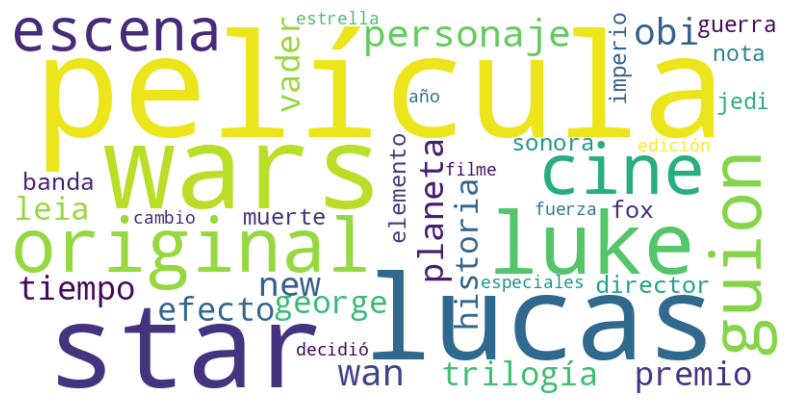

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

filtered_words = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

cleaned_text = " ".join(filtered_words)

wordcloud = WordCloud(width=800, height=400, background_color="white", collocations=False,max_words=40).generate(cleaned_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2.3 Usando el texto que conseguiste en el punto 1).



#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Volvemos a procesar el texto real
doc = nlp(texto_extraido)

# 1) Obtener TODAS las oraciones sin eliminar stopwords
sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]

print("Cantidad de oraciones usadas:", len(sentences))

# 2) Crear matriz documento-vocabulario (CountVectorizer limpia por sí mismo)
vectorizer = CountVectorizer(token_pattern=r"(?u)\b(?!\d+\b)\w+\b")
document_term_matrix = vectorizer.fit_transform(sentences)

vocabulario = vectorizer.get_feature_names_out()

print("\nForma de la matriz documento-vocabulario:", document_term_matrix.shape)
print("\nPrimeras 20 palabras del vocabulario:", vocabulario[:20])


Cantidad de oraciones usadas: 313

Forma de la matriz documento-vocabulario: (313, 2826)

Primeras 20 palabras del vocabulario: ['20th' '3po' '4k' '70mm' 'a' 'abandonada' 'abandonados' 'abrahámica'
 'abre' 'abril' 'absolutamente' 'abstracta' 'acaba' 'academia' 'accedió'
 'accidente' 'acciones' 'acción' 'acento' 'aceptar']



#### 2.3.2 Determina la longitud de tu vocabulario.

In [11]:
longitud_vocabulario = len(vocabulario)

print("Longitud del vocabulario:", longitud_vocabulario)

Longitud del vocabulario: 2826



#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_matrix = tfidf_transformer.fit_transform(document_term_matrix)

print("Forma de la matriz TF-IDF:", tfidf_matrix.shape)
print("\nMatriz TF-IDF (primeras 5 filas):")
print(tfidf_matrix.toarray()[:5])

Forma de la matriz TF-IDF: (313, 2826)

Matriz TF-IDF (primeras 5 filas):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Conclusiones

El trabajo me permitió recorrer el proceso de obtención, lmpieza y analisis de una fuente web real, a través del scraping de Wikipedia sobre el Ep IV de Star Wars.
El uso de encabezados HTTP personalizados fue fundamental para garantizar la correcta descarga de los contenidos.
Este trabajo también me mostró la importancia de normalizar el texto, eliminar los caracteres corrector, unificar a minúsculas y filtrar stop words, que con estas tuve un problema en en las primeras pruebas del modelo. El filtrado que use también permitió conservar terminos relevantes como designaciones particulares del unierso de Star Wars y nombres propios (ej. R2-D2, C-3PO), evitando que el modelo las elimine por error.

# ENTREGA




# Anexo, código de ejemplo del uso de wordcloud

Instalar e importar la librería

In [ ]:
# instalar wordcloud
!pip install wordcloud


In [ ]:

# Importar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)


Mostramos la imagen generada

In [ ]:

# mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Modificamos el ejemplo anterior agregando palabras en español que no queremos que considere para crear la nube de palabras. Estas son las stop_words



In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Definir stopwords en español
stopwords_es = set(STOPWORDS)
stopwords_es.update(["con", "que", "los", "para", "un", "una", "el", "la", "en", "y", "o", "de", "a", "se", "es", "al", "como", "por", "no", "su", "más", "pero", "si", "este", "esta", "eso", "esa", "todo", "todos", "todas", "cada", "cual", "cualquier", "algo", "alguna", "algún", "ningún", "ninguna", "ninguno", "otro", "otros", "otras", "sobre", "entre", "durante", "desde", "hasta", "también", "así", "mismo", "misma", "mismo", "misma", "tan", "tanto", "tanta", "muy", "poco", "poca", "poco", "nada", "solo", "sola", "solo", "sola", "siempre", "nunca", "jamás", "casi", "aproximadamente", "cerca", "lejos", "antes", "después", "ahora", "hoy", "ayer", "mañana", "luego", "mientras", "mientras tanto", "después de", "antes de", "durante", "sin", "aunque", "a pesar de", "debido a", "gracias a", "por qué", "cómo", "dónde", "cuándo", "quién", "qué", "cuál"])

# Crear un objeto WordCloud con stopwords en español
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords_es).generate(text)

# Mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
